<a href="https://colab.research.google.com/github/luckhazzard03/-IBM-AI-Developer/blob/main/DataScience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml


In [7]:
boston = fetch_openml(data_id=42165, as_frame=True)
df = boston.frame
df['PRICE'] = boston.target

print(df.head())
print(df.info())
print(df.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice   PRICE  
0       WD         Normal     208

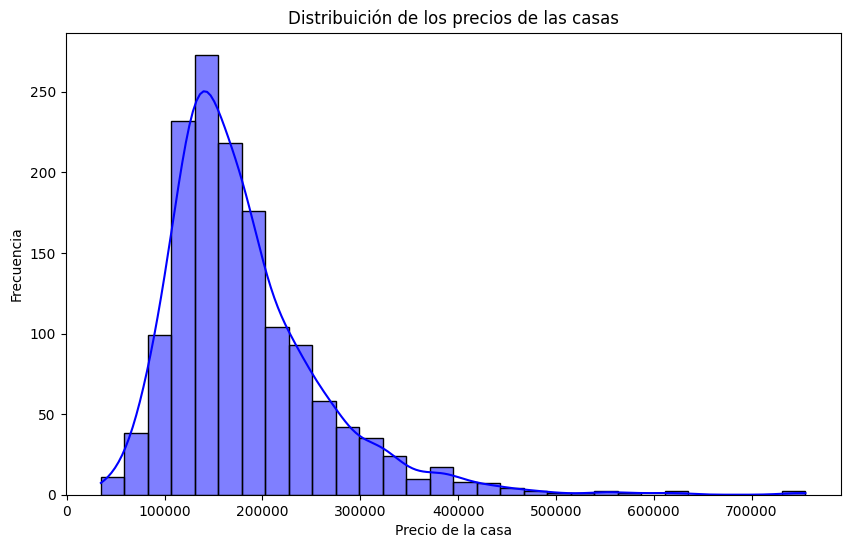

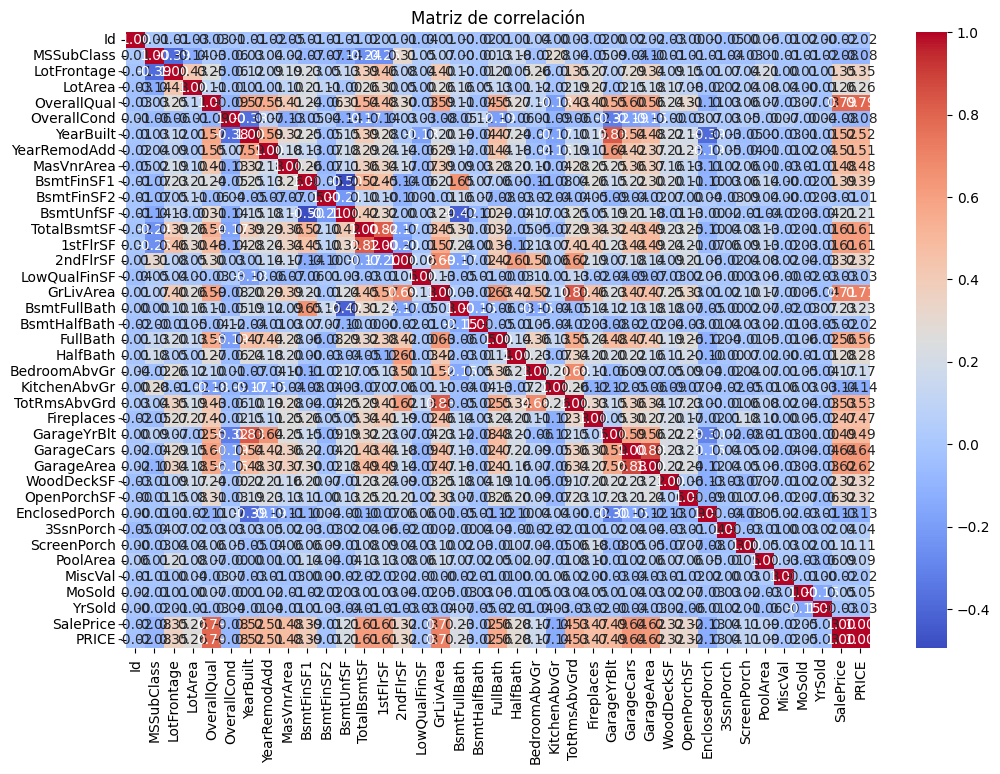

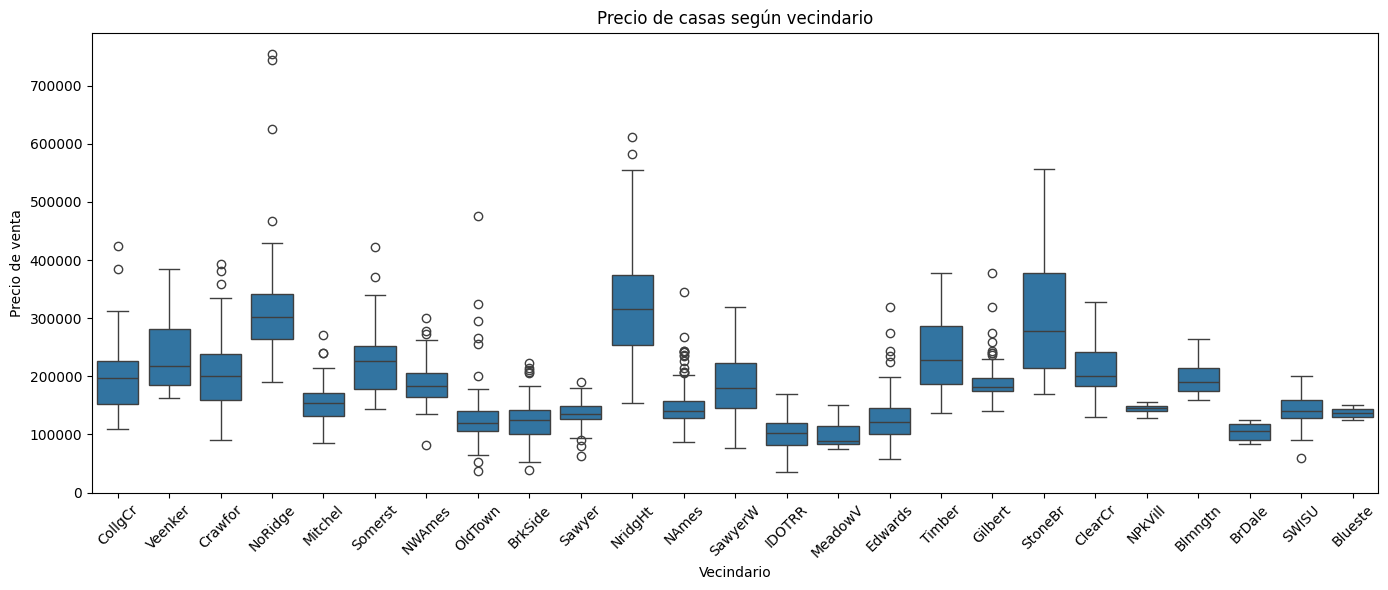

In [19]:
# Histograma de la variable ´PRICE´
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], kde=True, bins=30, color='blue')
plt.title('Distribuición de los precios de las casas')
plt.xlabel('Precio de la casa')
plt.ylabel('Frecuencia')
plt.show()

#Seleccionar solo las columnas númericas para calcular la matriz de correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Correlación entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

# Boxplot del precio según vecindario
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Precio de casas según vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Precio de venta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
#Eliminar columnas con demasiados valores nulos
threshold = 0.8 # Si más del 80% son nulos, eliminamos
missing = df.isnull().mean()
df = df.loc[:, missing < threshold]

# Eliminar filas con valores nulos restantes
df = df.dropna()

print(f"\n✅ Tamaño del dataset después de limpieza: {df.shape}")


✅ Tamaño del dataset después de limpieza: (583, 78)


In [23]:
# Separar variables numéricas y categoricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Número de variables numéricas: {len(numeric_cols)}")
print(f"✅ Número de variables categóricas: {len(categorical_cols)}")

✅ Número de variables numéricas: 39
✅ Número de variables categóricas: 39


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Variables seleccionadas
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'Neighborhood']
target = 'SalePrice'

# Definir variables independientes y objetivo
X = df[features]
y = df[target]

# Separar variables numéricas y categóricas seleccionadas
num_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
cat_features = ['Neighborhood']

# Preprocesador: convierte 'Neighborhood' a variables dummy (OneHot)
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
], remainder='passthrough')  # deja las numéricas como están

# Crear el pipeline con preprocesamiento y modelo de regresión
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el modelo
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"R² score: {r2:.2f}")


Error cuadrático medio (MSE): 1485431401.21
R² score: 0.77


In [27]:
import numpy as np
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")


RMSE: 38541.29


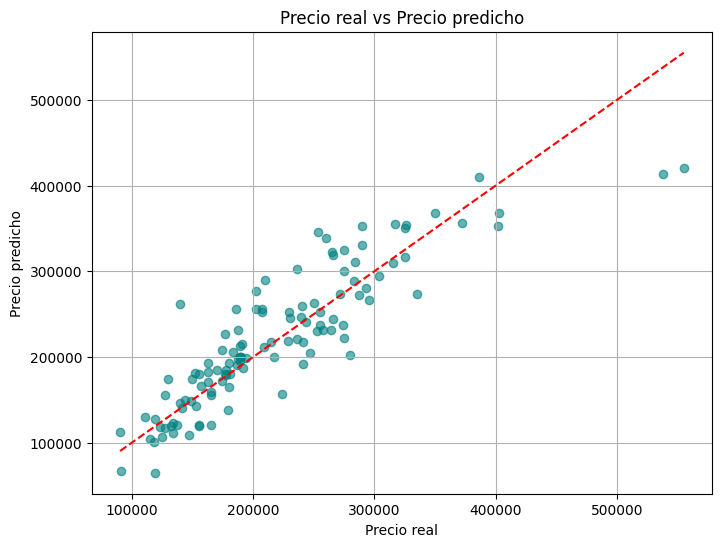

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Precio real vs Precio predicho')
plt.grid(True)
plt.show()

In [29]:
# Extraer coeficientes del modelo
regressor = model.named_steps['regressor']
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(cat_features)
all_features = list(feature_names) + num_features

for name, coef in zip(all_features, regressor.coef_):
    print(f"{name}: {coef:.2f}")


Neighborhood_Blmngtn: -26500.99
Neighborhood_Blueste: -32151.78
Neighborhood_BrDale: -19090.84
Neighborhood_BrkSide: -11887.97
Neighborhood_ClearCr: -8170.27
Neighborhood_CollgCr: 4320.13
Neighborhood_Crawfor: 26961.49
Neighborhood_Edwards: -40495.81
Neighborhood_Gilbert: -4210.65
Neighborhood_IDOTRR: -5073.29
Neighborhood_MeadowV: -32662.28
Neighborhood_Mitchel: 15983.82
Neighborhood_NAmes: -7591.01
Neighborhood_NPkVill: -28055.63
Neighborhood_NWAmes: -14848.13
Neighborhood_NoRidge: 48555.99
Neighborhood_NridgHt: 56597.28
Neighborhood_OldTown: -31299.08
Neighborhood_SWISU: -27619.65
Neighborhood_Sawyer: 3119.39
Neighborhood_SawyerW: -4216.93
Neighborhood_Somerst: 12717.82
Neighborhood_StoneBr: 66729.27
Neighborhood_Timber: 16594.79
Neighborhood_Veenker: 42294.33
OverallQual: 20812.66
GrLivArea: 51.03
GarageCars: 25181.42
TotalBsmtSF: 13.74


In [31]:
# Obtener el modelo y el codificador
regressor = model.named_steps['regressor']
ohe = model.named_steps['preprocessor'].named_transformers_['cat']

# Nombres de las variables después del one-hot encoding
feature_names = ohe.get_feature_names_out(cat_features)
all_features = list(feature_names) + num_features

# Mostrar coeficientes
print("Importancia de las variables (coeficientes):")
for name, coef in zip(all_features, regressor.coef_):
    print(f"{name}: {coef:.2f}")



Importancia de las variables (coeficientes):
Neighborhood_Blmngtn: -26500.99
Neighborhood_Blueste: -32151.78
Neighborhood_BrDale: -19090.84
Neighborhood_BrkSide: -11887.97
Neighborhood_ClearCr: -8170.27
Neighborhood_CollgCr: 4320.13
Neighborhood_Crawfor: 26961.49
Neighborhood_Edwards: -40495.81
Neighborhood_Gilbert: -4210.65
Neighborhood_IDOTRR: -5073.29
Neighborhood_MeadowV: -32662.28
Neighborhood_Mitchel: 15983.82
Neighborhood_NAmes: -7591.01
Neighborhood_NPkVill: -28055.63
Neighborhood_NWAmes: -14848.13
Neighborhood_NoRidge: 48555.99
Neighborhood_NridgHt: 56597.28
Neighborhood_OldTown: -31299.08
Neighborhood_SWISU: -27619.65
Neighborhood_Sawyer: 3119.39
Neighborhood_SawyerW: -4216.93
Neighborhood_Somerst: 12717.82
Neighborhood_StoneBr: 66729.27
Neighborhood_Timber: 16594.79
Neighborhood_Veenker: 42294.33
OverallQual: 20812.66
GrLivArea: 51.03
GarageCars: 25181.42
TotalBsmtSF: 13.74
